# Project Phase One - Used Car Prices in United States

### Phase 1 report checklist
Here's a checklist of items that you _absolutely_ should include:

1. [x] a background report on the team's members, their self-identified skills, and individual contributions
- [x] a discussion of what you would like to your analysis to do, who/what it will support
- [x] an exhibition of analyses from dataset(s) explored, including visual analyses, captions, and useful descripitions
- [x] a discussion of who might be interested in your analysis
- [x] a discussion of how your analysis might fit into an application or investigation
- [x] a discussion of how your analysis is limited and could be improved
- [x] a selection of data for continued analysis, including justification
- [ ] a discussion of how your analysis might be completed and disseminated, i.e., who's the target audience?

Additionally, by the end of the term your final report should inlcude items like
1. [ ] a README.md that describes what is present in the project analysis and how it may be repeated
- [ ] code that documents your analysis&mdash;your instructor should be able to re-run the analysis!
- [ ] tables, figures, and discussion supporting the analysis' interpretation

_Note_: These are not exhaustive lists of topics or tasks worth covering in your project. In general, if there's something interesting about your project, whether relating to the source data's construction, existence, or novelty of the tergeted tools and applications, or _anything else_, then be sure to document it!

- [x] standardize the scale of the variables for the box plots.
- [X] make the bar plots prettier
- [x] choose a dataset from available ones.
- [x] examine the remaining dataset
- [x] add lists from other notes
- [x] correlation matrix
- [x] look for and clean up outliers
- [x] missing/null values.
- [ ] LATER: turn off sampling and re-run
- [ ] LATER: show density of locations on a map of car listing locations, correlation to price or featuers.

## Team Background

- Project Grp 08

### Team Members

- Team member 1
    - Name: Richard Anton
    - Email: [rna63@drexel.edu](mailto:rna63@drexel.edu)
    
I am a MS CS student at Drexel. I expect to complete my degree in June 2023 at the end of the next quarter.
I have been a software developer for a long time, and have significant experience with Python.
I have some hands on experience with machine learning, and have taken machine learning, deep learning, artificial intellience, computer vision and DSCI 501 courses at Drexel.

I do not have as much background with exploratory data analysis.

A number of the prior projects that I have worked on have been focused on classification, for example of images or sentiment analysis of textual data.

Since much of my experience with handling data sets for machine learning problems has been through graduate CS courses, I have implemented them typically without a dependency on anything but NumPy and matplotlib for visualizing results, which means I actually have limited experience with existing common tools like scikit-learn. 

I am competent at using LaTex, but not an advanced user.

I do have experience with numpy and some with pandas.  I have some experience with matplotlib for visualizing aspects of data.

The areas and skills I would like to grow through this project are:

1. More hands-on experience with scikit-learn and Pandas libraries.
2. More practice with visualization tools, such as matplotlib and Seaborn.
3. More practical experience with investigating a dataset, i.e. what data cleaning is needed.
4. Experience with a practical machine learning regression problem.
5. Feature selection techniques to make machine learning problems more effective.


## Topic 

I would like to better understand some of the things that influence the price of used vehicles.
During COVID-19 supply problems, used car prices increased significantly when new car availability decreased which caused some of my curiousity in this area.

Additionally, I have always been interested in cars overall, and have bought and sold a number of older and sometimes antique vehicles, and it would be of practical use to be better able to understand what is a fair price.

This purpose is also applicable to user car vendors, consumers selling their used vehicles privately or as trade-ins, new car dealerships purchasing trade-in vehicles, and car information websites such as [edmunds.com](http://www.edmunds.com) and [Kelly Blue Book](http://www.kbb.com) that provide price range information for vehicles based on vehicle details.

I want to investigate what factors influence used car prices compared to the obvious ones of age and odomoter mileage. It is also interesting to understand the relative importance of other factors, such as how much the make and model of the car matters for different age vehicles compared to the condition. I am also curious how much location, within different states for example, affects the price of similar vehicles.

I am interested exploring a regression problem on tabular data with different types of input features since I have more experience to date with classification.

I think this is a good topic to expand my experience with visualization techniques, gain experience with practical data preparation, and practice using relevant libraries and frameworks, especially scikit-learn, Pandas, and XGBoost.

Particular techniques I want to investigate in part two of this project are

- Basic regression techniques for this problem, such as linear, ridge and lasso regression
- Regression using ensemble models, such as Random Cut Forest and XGBoost
- Feature selection techniques.
    - Using Random Forest and/or XGBoost model to evaluate feature importance.

In addition to the already described objectives, if time permits, I plan to choose the best performing regression model and embed it into a [Streamlit](https://streamlit.io/) project to create a web tool which can take a set of inputs and predict the price of a used car.


## Datasets Available

There are a number of datasets available related to used cars listing or sales. They have different features, different sizes of samples and some are more prepared and preprocessed than others.

These relevant datasets located include:

- **Cargurus:** <https://www.kaggle.com/datasets/ananaymital/us-used-cars-dataset>
    - This dataset contains rows with 66 columns for three million user car listings.
    - This dataset was created from Cargurus inventory in September 2020 using a crawler built by the owner of the Kaggle dataset.
- **TrueCar:** https://www.kaggle.com/datasets/jpayne/852k-used-car-listings
    - The provider created this dataset by scraping TrueCar.com for used car listings on 9/24/2017.
    - Columns include year, make, model, price, VIN, city, state
- **Craigslist:** https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data
    - This dataset was created by the provider scraping data from Craigslist car listings.
    - The columns include price, condition, manufacturer, and latitude/longitude plus 18 other categories.
- **Carvana:** https://www.kaggle.com/datasets/ravishah1/carvana-predict-car-prices
    - This data is based on Carvana car sales, and only contains about 22,000 rows with four columns.
- **USDOT:** https://catalog.data.gov/dataset/auto-sales
    - This is available through the government bts.gov system at <https://data.bts.gov/Research-and-Statistics/Auto-Sales/7n6a-n5tz>. It seems to be primarily a historic aggregate time series of new car sales in the USA. It is part of the monthly transportation statistics published by the US Department of Transportation. It does not seem very useful to the objectives of this project. It does provide some contextual timeseries data for volume of new cars to compare against used car prices by year.

Before completing exploratory data analysis it seems likely that the Cargurus and/or Craigslist datasets would be most useful for this analysis, but this also depends on the quality of the data and effort required to prepare it within the available time so the final choice will be based on the phase one report.


## Analysis of Datasets

- [ ] TODO: Conduct an extensive exploratory data analysis focused on an identified topic and potentially relevant, available datasets, addressing their capacities for a more in-depth analysis. 

- [ ] TODO: Include both a discussion of the availability and scale of the project's target data and an exploratory analysis. 



The graph below from the bgs.gov based on data collected by the US Department of transportation shows new car sales volumen by month.
![Monthly new car sales](images/monthly_new_car_sales.png)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

import random

In [3]:
sns.set(style="darkgrid")

In [4]:
from IPython.display import display, HTML

In [5]:
class Heading(object):
    template = """<div style="float: left; padding: 10px;">
    <h{size}>{0}</h{size}>
    </div>"""
    def __init__(self, txt, size):
        self.txt = txt
        self.size = size
        
    def _repr_html_(self):
        return self.template.format(self.txt, size=self.size)
    
    def __repr__(self):
        return self.txt

def show_heading(txt, size=2):
    display(Heading(txt, size=size))
    

In [6]:
datasets = {
    'carvana': {
        'title': "Carvana",
        'path': "datasets/carvana/carvana.csv",
        'sample': False,
        'drop_cols': []
    },
    'craigslist': {
        'title': "Craigslist",
        'path': "datasets/craigslist/vehicles.csv",
        'sample': True,
        'drop_cols': ['id','url','region','VIN','region_url','county','lat','long','description','image_url','posting_date']
    },
    'cargurus': {
        'title': "Cargurus",
        'path': "datasets/cargurus/used_cars_data.csv",
        'sample': True,
        'drop_cols': ['vin', 'description', 'listing_id', 'major_options', 'wheel_system','trimId', 'sp_id', 'main_picture_url', 'latitude', 'longitude']
    },
    'truecar': {
        'title': "TrueCar",
        'path': "datasets/truecar/true_car_listings.csv",
        'sample': True,
        'drop_cols': ['Vin']
    }
}

In [7]:
# NOTE: This is where you select the dataset.

#use_dataset = 'cargurus'
use_dataset = 'craigslist'
#use_dataset = 'carvana'
#use_dataset = 'truecar'

dataset = datasets[use_dataset]
dataset_title = dataset['title']
ds_path = dataset['path']


In [8]:
if dataset['sample']:
    #p = 0.1  # Keep 10%
    p = 0.01
    orig_df = pd.read_csv(
         ds_path,
         header=0, 
         low_memory=False,
         skiprows=lambda i: i>0 and random.random() > p
    )
else:
    orig_df = pd.read_csv(ds_path, low_memory=False)

In [9]:
def describe_col(colname, df):
    show_heading("Column: {}".format(colname))

    if is_numeric_dtype(df[colname]):    
        print("Numeric")
        if df[colname].dtype == 'int64':
            fmt = "{0:.0f}"
        else:
            fmt = "{0:.5f}"
    else:
        if is_string_dtype(df[colname]):
            print("String")
        else:
            print("Other")
        fmt = "{}"
    d = df[colname].describe().apply(fmt.format)
    display(d)

In [10]:
def describe_data(title, df):
    show_heading("Dataset Name: {}".format(title), size='1')
    print("Info:")
    display(df.info())
    print("Sample:")
    pd.set_option('display.max_columns', None)
    display(df.head())
    print("Shape:", df.shape)
    print("Types:")
    display(df.dtypes)
    
    null_ratio = df.isnull().sum()/len(df.index)
    print("Null Proportion:")
    display(null_ratio)

    for colname in df.columns:
        describe_col(colname, df)

In [11]:
# Drop any columns we don't want and set df var.
df = orig_df

print("Original Columns:", df.columns)
if dataset['drop_cols']:
    df = orig_df.drop(columns=dataset['drop_cols'])
    print("Using Columns:", df.columns)

Original Columns: Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')
Using Columns: Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'state'],
      dtype='object')


In [12]:
# Describe the dataset.
describe_data(dataset_title, df)

Dataset Name: Craigslist

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4291 entries, 0 to 4290
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         4291 non-null   int64  
 1   year          4284 non-null   float64
 2   manufacturer  4120 non-null   object 
 3   model         4231 non-null   object 
 4   condition     2526 non-null   object 
 5   cylinders     2515 non-null   object 
 6   fuel          4253 non-null   object 
 7   odometer      4239 non-null   float64
 8   title_status  4215 non-null   object 
 9   transmission  4264 non-null   object 
 10  drive         2991 non-null   object 
 11  size          1211 non-null   object 
 12  type          3351 non-null   object 
 13  paint_color   2965 non-null   object 
 14  state         4291 non-null   object 
dtypes: float64(2), int64(1), object(12)
memory usage: 503.0+ KB


None

Sample:


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,22590,2013.0,ford,f150 super cab xl pickup 4d,good,6 cylinders,other,14169.0,clean,other,NaN,NaN,pickup,silver,al
1,25990,2015.0,lexus,nx 300h sport utility 4d,good,NaN,other,55783.0,clean,other,NaN,NaN,hatchback,white,al
2,20590,2013.0,acura,mdx sport utility 4d,good,6 cylinders,gas,77087.0,clean,other,NaN,NaN,other,silver,al
3,17590,2015.0,volvo,s60 t5 premier sedan 4d,good,NaN,gas,63512.0,clean,automatic,NaN,NaN,sedan,blue,al
4,15000,2009.0,toyota,tacoma 4x4,good,6 cylinders,gas,213800.0,clean,automatic,4wd,mid-size,truck,silver,al


Shape: (4291, 15)
Types:


price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
state            object
dtype: object

Null Proportion:


price           0.000000
year            0.001631
manufacturer    0.039851
model           0.013983
condition       0.411326
cylinders       0.413890
fuel            0.008856
odometer        0.012118
title_status    0.017711
transmission    0.006292
drive           0.302960
size            0.717781
type            0.219063
paint_color     0.309019
state           0.000000
dtype: float64

Column: price

Numeric


count         4291
mean         46288
std        1884467
min              0
25%           5995
50%          13995
75%          25999
max      123456789
Name: price, dtype: object

Column: year

Numeric


count    4284.00000
mean     2011.39146
std         9.14018
min      1920.00000
25%      2008.00000
50%      2014.00000
75%      2017.00000
max      2021.00000
Name: year, dtype: object

Column: manufacturer

String


count     4120
unique      38
top       ford
freq       705
Name: manufacturer, dtype: object

Column: model

String


count      4231
unique     1956
top       f-150
freq         78
Name: model, dtype: object

Column: condition

String


count     2526
unique       6
top       good
freq      1224
Name: condition, dtype: object

Column: cylinders

String


count            2515
unique              8
top       6 cylinders
freq             1006
Name: cylinders, dtype: object

Column: fuel

String


count     4253
unique       5
top        gas
freq      3540
Name: fuel, dtype: object

Column: odometer

Numeric


count       4239.00000
mean       98762.52111
std       221477.35800
min            0.00000
25%        38975.50000
50%        85411.00000
75%       134681.00000
max      9999999.00000
Name: odometer, dtype: object

Column: title_status

String


count      4215
unique        6
top       clean
freq       4081
Name: title_status, dtype: object

Column: transmission

String


count          4264
unique            3
top       automatic
freq           3408
Name: transmission, dtype: object

Column: drive

String


count     2991
unique       3
top        4wd
freq      1354
Name: drive, dtype: object

Column: size

String


count          1211
unique            4
top       full-size
freq            659
Name: size, dtype: object

Column: type

String


count      3351
unique       13
top       sedan
freq        867
Name: type, dtype: object

Column: paint_color

String


count      2965
unique       12
top       white
freq        788
Name: paint_color, dtype: object

Column: state

String


count     4291
unique      51
top         ca
freq       521
Name: state, dtype: object

In [13]:
def show_pair_plots(df):
    show_heading("Pair Plots")
    # hue='Name', 
    
    df = df.copy()
    # preprocess to convert booleans
    for colname in df.columns:
        if df[colname].dtype == 'bool':
            print('bool col:', colname)
            df[colname] = df[colname].replace({True: 1, False: 0})
            
    g = sns.pairplot(df, diag_kind='hist', height=2.5);

    plt.show()

In [14]:
def zscore(data):
    mean = np.mean(data)
    stdev = np.std(data)
    
    standardized_data = (data - mean) / stdev
    
    return standardized_data

In [15]:
def show_col_box_plots(df, rescale=True):
    show_heading("Box Plots (normalized)" if rescale else "Box Plots")
    columns_to_plot = [cn for cn in df.columns if is_numeric_dtype(df[cn])]

    fig, axes = plt.subplots(ncols=len(columns_to_plot))

    df = df.copy()
    df = df.fillna(0)

        
    for column, axis in zip(columns_to_plot, axes):
        data = df[column]
        if rescale:
            data = zscore(data)
        sns.boxplot(data=data, ax=axis) 
        axis.set_title(column)

    plt.tight_layout()
    plt.show()


In [16]:
def show_col_hist(df):
    show_heading("Histograms")
    columns_to_plot = [cn for cn in df.columns if is_numeric_dtype(df[cn])]

    fig, axes = plt.subplots(ncols=len(columns_to_plot))

    for column, axis in zip(columns_to_plot, axes):
            sns.histplot(data=df[column], kde=True, ax=axis, bins=20)
            axis.set_title(column)

    plt.tight_layout()
    plt.show()


In [17]:
def show_bar_plots(df):
    colnames = [cn for cn in df.columns if not is_numeric_dtype(df[cn])]

    n_uniq = df[colnames].nunique()

    print("Column unique counts:")
    print([(c,n) for c,n in zip(colnames, n_uniq)])

    MAX_BAR_VALUES = 50
    keeping = [c for c,n in zip(colnames, n_uniq) if n <= MAX_BAR_VALUES]
    topn_colnames = [c for c,n in zip(colnames, n_uniq) if n > MAX_BAR_VALUES]
    
    counts = {c: n for c,n in zip(colnames, n_uniq)}

    if len(colnames) == 0:
        return
    show_heading("Bar Charts")
   
    n_cols = 2
    n_rows = (len(colnames) + n_cols - 1) // n_cols
    
    
    fig = plt.figure(figsize=(12, n_rows * 7))
    for idx, column in enumerate(colnames):
        axis = fig.add_subplot(n_rows, n_cols, idx + 1)
        
        data = df[column]
            
        if counts[column] > MAX_BAR_VALUES:
            g = sns.countplot(y=data, ax=axis, order=pd.value_counts(df[column]).iloc[:MAX_BAR_VALUES].index)
            axis.set_title("Top {}: {}".format(MAX_BAR_VALUES, column))
        else:
            data = df[column]
            g = sns.countplot(y=data, ax=axis)
            axis.set_title(column)
        
    plt.suptitle("Categorical Features")
    
    plt.rcParams['figure.constrained_layout.use'] = True

    plt.show()


In [18]:
def show_correlation(df, show_heatmap=True):
    show_heading("Correlation Heatmap")  

    df = df.copy()
    
    for colname in df.columns:
        if is_numeric_dtype(df[colname]):
            #print("norm:", colname)
            df[colname] = zscore(df[colname])
        else:
            #print("cat:", colname)
            df[colname] = df[colname].astype("category").cat.codes
    
    display(df.corr(numeric_only=False))
    if show_heatmap:
        sns.heatmap(df.corr(), cmap='RdBu', vmin=-1, vmax=1) #, annot=True)
        plt.show()


Correlation Heatmap

norm: price
norm: year
cat: manufacturer
cat: model
cat: condition
cat: cylinders
cat: fuel
norm: odometer
cat: title_status
cat: transmission
cat: drive
cat: size
cat: type
cat: paint_color
cat: state


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
price,1.000000,-0.075274,-0.014026,0.010252,-0.013844,-0.017116,-0.000001,-0.001107,-0.002450,-0.004863,-0.018377,-0.010066,-0.017651,-0.014821,0.011460
year,-0.075274,1.000000,0.070989,0.065590,-0.028523,-0.136510,0.104408,-0.111546,-0.004519,0.145513,-0.070371,-0.117491,0.133767,0.038167,0.012439
manufacturer,-0.014026,0.070989,1.000000,0.032248,-0.029337,-0.047506,0.002001,-0.025810,0.018070,0.001557,-0.015963,0.023812,0.064311,-0.001977,-0.005160
model,0.010252,0.065590,0.032248,1.000000,0.019595,0.011951,0.078835,-0.009981,0.007256,0.001877,-0.038903,-0.024886,-0.060374,0.018553,0.001111
condition,-0.013844,-0.028523,-0.029337,0.019595,1.000000,0.237648,0.171849,0.007804,0.072886,0.436046,0.155628,0.167413,0.154296,0.145270,-0.008953
cylinders,-0.017116,-0.136510,-0.047506,0.011951,0.237648,1.000000,-0.113587,0.041584,0.034234,-0.055170,0.336948,0.356621,0.182894,0.174822,-0.014832
fuel,-0.000001,0.104408,0.002001,0.078835,0.171849,-0.113587,1.000000,-0.114870,0.012411,0.257576,-0.021960,-0.077350,0.013255,-0.033049,-0.058403
odometer,-0.001107,-0.111546,-0.025810,-0.009981,0.007804,0.041584,-0.114870,1.000000,-0.006626,-0.110798,-0.017723,0.061723,-0.023879,0.026411,-0.000288
title_status,-0.002450,-0.004519,0.018070,0.007256,0.072886,0.034234,0.012411,-0.006626,1.000000,-0.037110,0.024938,0.118108,-0.023400,0.024455,0.006986
transmission,-0.004863,0.145513,0.001557,0.001877,0.436046,-0.055170,0.257576,-0.110798,-0.037110,1.000000,-0.021355,-0.201512,0.135062,0.066863,0.015492


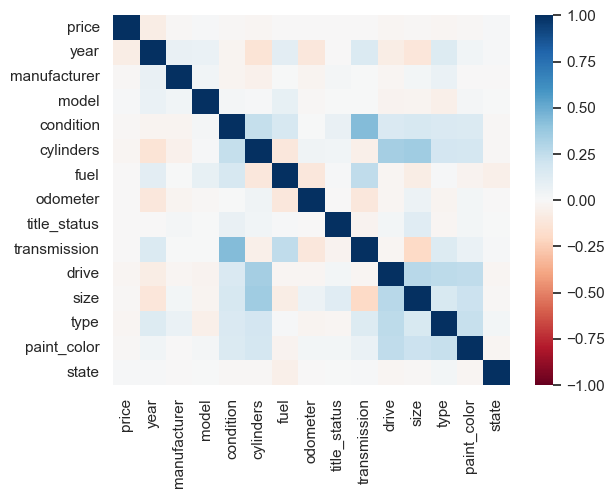

In [19]:
show_correlation(df, show_heatmap=True)

In [25]:
def visualize_data(title, df):
    show_col_box_plots(df, rescale=False)
    show_col_box_plots(df)
    show_col_hist(df)
    show_bar_plots(df)
    show_pair_plots(df)


Box Plots

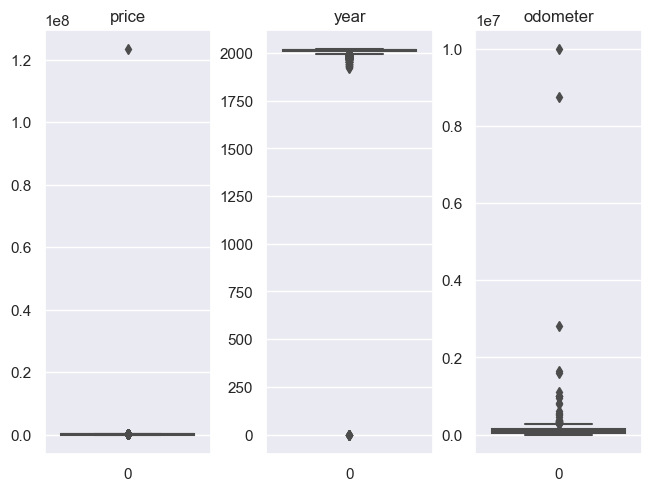

In [47]:
#visualize_data(dataset_title, df)

show_col_box_plots(df, rescale=False)

### Outliers

The box plots for the numeric features show that there are some outliers that we need to cleanup.


In [46]:
# Cap outliers in numeric columns based on number of standard deviations.
def cap_outliers(df, z_mult):
    df = df.copy()
    
    for colname in df.columns:
        if is_numeric_dtype(df[colname]):
            lower_limit = df[colname].mean() - z_mult * df[colname].std()
            upper_limit = df[colname].mean() + z_mult * df[colname].std()
            print(f"Capping column: {colname} lower={lower_limit} upper={upper_limit}")
            
            df[colname] = np.where(
                df[colname] > upper_limit, upper_limit,
                np.where(
                    df[colname] < lower_limit, lower_limit,
                    df[colname]
                )
            )

    return df

In [44]:
show_heading("Data Cleaning")

df_cleaned = df.copy()

# Do some adjustments on particular columns based on meaning of columns.

# Drops rows without price information.
df_cleaned  = df_cleaned.dropna(subset=['price'])

# No zero or negative prices.
MIN_PRICE = 1
# Keep the max price to a reasonable value.
MAX_PRICE = 300000

df_cleaned = df_cleaned.drop(df[df['price'] < MIN_PRICE].index)
df_cleaned = df_cleaned.drop(df[df['price'] > MAX_PRICE].index)

# No years in the future.
MAX_YEAR = 2023
df_cleaned['year'] = np.where(df_cleaned['year'] > MAX_YEAR, MAX_YEAR, df_cleaned['year'])

# No huge odometer values.
MAX_MILES = 300000
df_cleaned['odometer'] = np.where(df_cleaned['odometer'] > MAX_MILES, MAX_MILES, df_cleaned['odometer'])

# cap outliers beyond 3 std devs.
df_cleaned = cap_outliers(df_cleaned, z_mult=3)

# Impute value for missing fields.
df_cleaned['year'] = df_cleaned['year'].fillna(df_cleaned['year'].mean())
df_cleaned['odometer'] = df_cleaned['odometer'].fillna(df_cleaned['odometer'].mean())

# TODO: replace categorical missing values with 'missing'

display(df_cleaned.describe())

Data Cleaning

Capping column: price lower=-26162.412577610332 upper=64152.472724186024
Capping column: year lower=1983.1131292495697 upper=2039.2371618159832
Capping column: odometer lower=-97297.67761347955 upper=282356.6610698298


,price,year,odometer
count,3957.000000,3957.000000,3957.000000
mean,18821.013316,2011.551376,92390.106510
std,14184.644011,7.351679,62613.991866
min,1.000000,1983.113129,0.000000
25%,7250.000000,2008.000000,39429.000000
50%,15500.000000,2013.000000,86683.000000
75%,27590.000000,2017.000000,135000.000000
max,64152.472724,2021.000000,282356.661070


Dataset Name: Cleaned Craigslist

Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3957 entries, 0 to 4290
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         3957 non-null   float64
 1   year          3957 non-null   float64
 2   manufacturer  3801 non-null   object 
 3   model         3903 non-null   object 
 4   condition     2433 non-null   object 
 5   cylinders     2359 non-null   object 
 6   fuel          3922 non-null   object 
 7   odometer      3957 non-null   float64
 8   title_status  3884 non-null   object 
 9   transmission  3937 non-null   object 
 10  drive         2754 non-null   object 
 11  size          1113 non-null   object 
 12  type          3089 non-null   object 
 13  paint_color   2759 non-null   object 
 14  state         3957 non-null   object 
dtypes: float64(3), object(12)
memory usage: 494.6+ KB


None

Sample:


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,22590.0,2013.0,ford,f150 super cab xl pickup 4d,good,6 cylinders,other,14169.0,clean,other,NaN,NaN,pickup,silver,al
1,25990.0,2015.0,lexus,nx 300h sport utility 4d,good,NaN,other,55783.0,clean,other,NaN,NaN,hatchback,white,al
2,20590.0,2013.0,acura,mdx sport utility 4d,good,6 cylinders,gas,77087.0,clean,other,NaN,NaN,other,silver,al
3,17590.0,2015.0,volvo,s60 t5 premier sedan 4d,good,NaN,gas,63512.0,clean,automatic,NaN,NaN,sedan,blue,al
4,15000.0,2009.0,toyota,tacoma 4x4,good,6 cylinders,gas,213800.0,clean,automatic,4wd,mid-size,truck,silver,al


Shape: (3957, 15)
Types:


price           float64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
state            object
dtype: object

Null Proportion:


price           0.000000
year            0.000000
manufacturer    0.039424
model           0.013647
condition       0.385140
cylinders       0.403841
fuel            0.008845
odometer        0.000000
title_status    0.018448
transmission    0.005054
drive           0.304018
size            0.718726
type            0.219358
paint_color     0.302755
state           0.000000
dtype: float64

Column: price

Numeric


count     3957.00000
mean     18821.01332
std      14184.64401
min          1.00000
25%       7250.00000
50%      15500.00000
75%      27590.00000
max      64152.47272
Name: price, dtype: object

Column: year

Numeric


count    3957.00000
mean     2011.55138
std         7.35168
min      1983.11313
25%      2008.00000
50%      2013.00000
75%      2017.00000
max      2021.00000
Name: year, dtype: object

Column: manufacturer

String


count     3801
unique      38
top       ford
freq       622
Name: manufacturer, dtype: object

Column: model

String


count      3903
unique     1850
top       f-150
freq         68
Name: model, dtype: object

Column: condition

String


count     2433
unique       6
top       good
freq      1203
Name: condition, dtype: object

Column: cylinders

String


count            2359
unique              8
top       6 cylinders
freq              952
Name: cylinders, dtype: object

Column: fuel

String


count     3922
unique       5
top        gas
freq      3280
Name: fuel, dtype: object

Column: odometer

Numeric


count      3957.00000
mean      92390.10651
std       62613.99187
min           0.00000
25%       39429.00000
50%       86683.00000
75%      135000.00000
max      282356.66107
Name: odometer, dtype: object

Column: title_status

String


count      3884
unique        6
top       clean
freq       3751
Name: title_status, dtype: object

Column: transmission

String


count          3937
unique            3
top       automatic
freq           3096
Name: transmission, dtype: object

Column: drive

String


count     2754
unique       3
top        4wd
freq      1234
Name: drive, dtype: object

Column: size

String


count          1113
unique            4
top       full-size
freq            606
Name: size, dtype: object

Column: type

String


count      3089
unique       13
top       sedan
freq        810
Name: type, dtype: object

Column: paint_color

String


count      2759
unique       12
top       white
freq        717
Name: paint_color, dtype: object

Column: state

String


count     3957
unique      51
top         ca
freq       474
Name: state, dtype: object

Box Plots

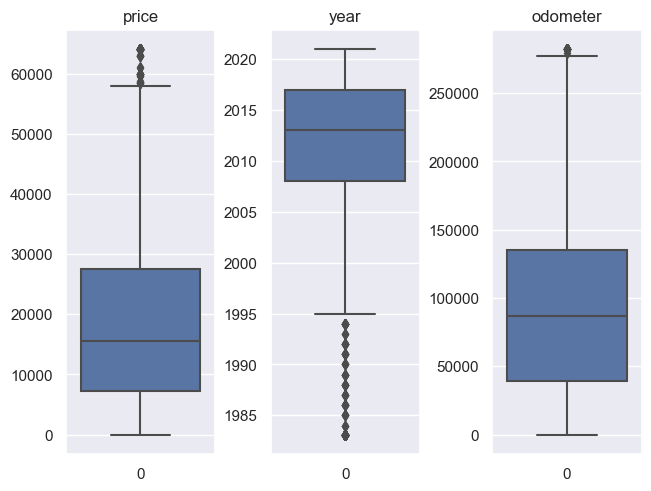

Box Plots (normalized)

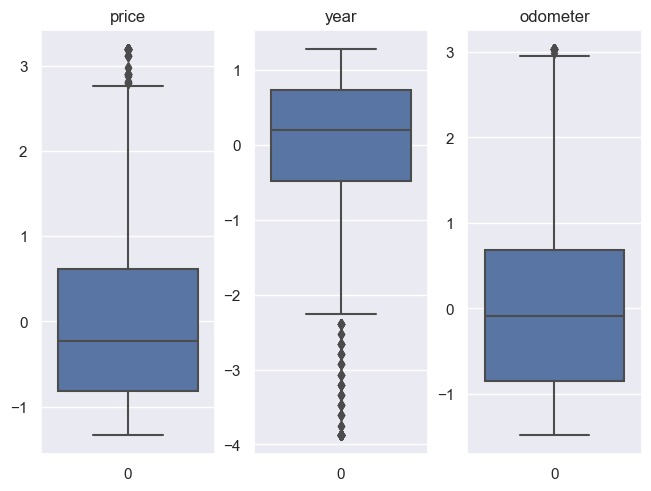

Histograms

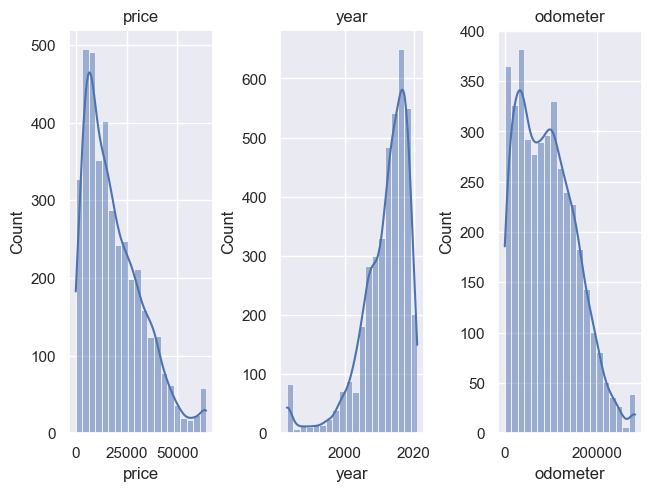

Column unique counts:
[('manufacturer', 38), ('model', 1850), ('condition', 6), ('cylinders', 8), ('fuel', 5), ('title_status', 6), ('transmission', 3), ('drive', 3), ('size', 4), ('type', 13), ('paint_color', 12), ('state', 51)]


Bar Charts

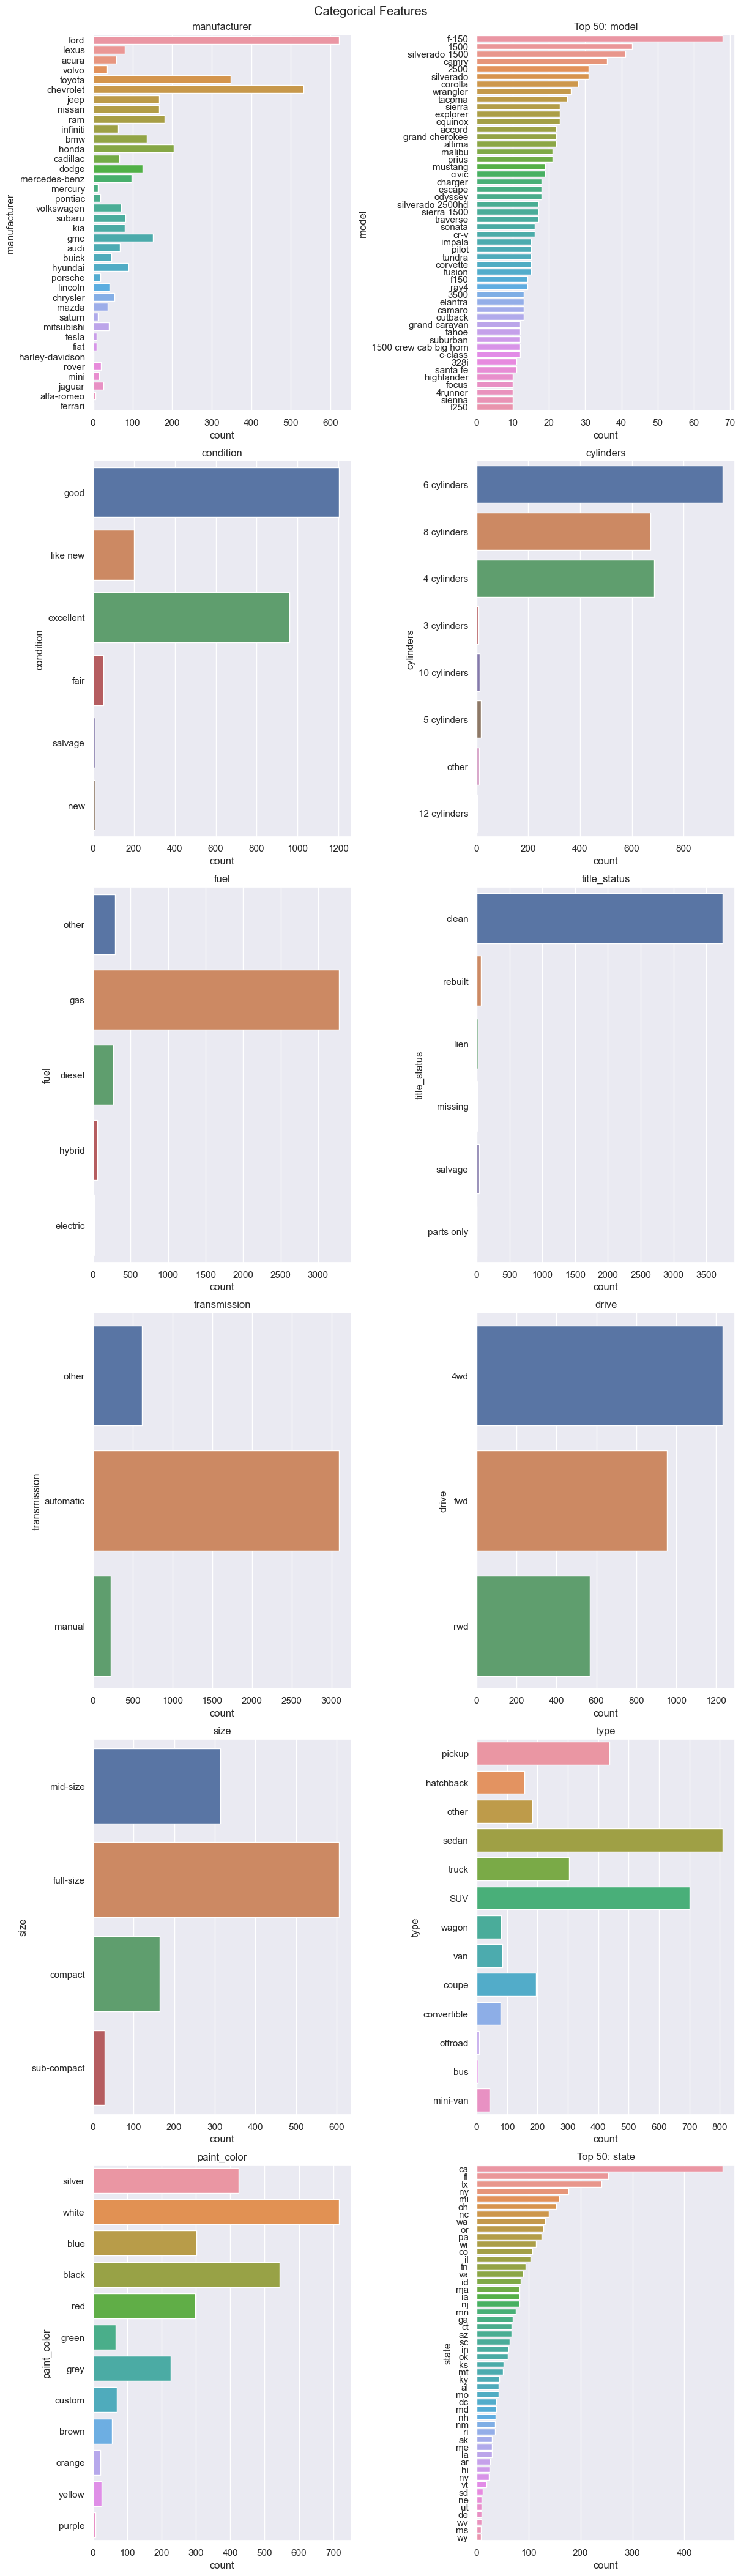

Pair Plots

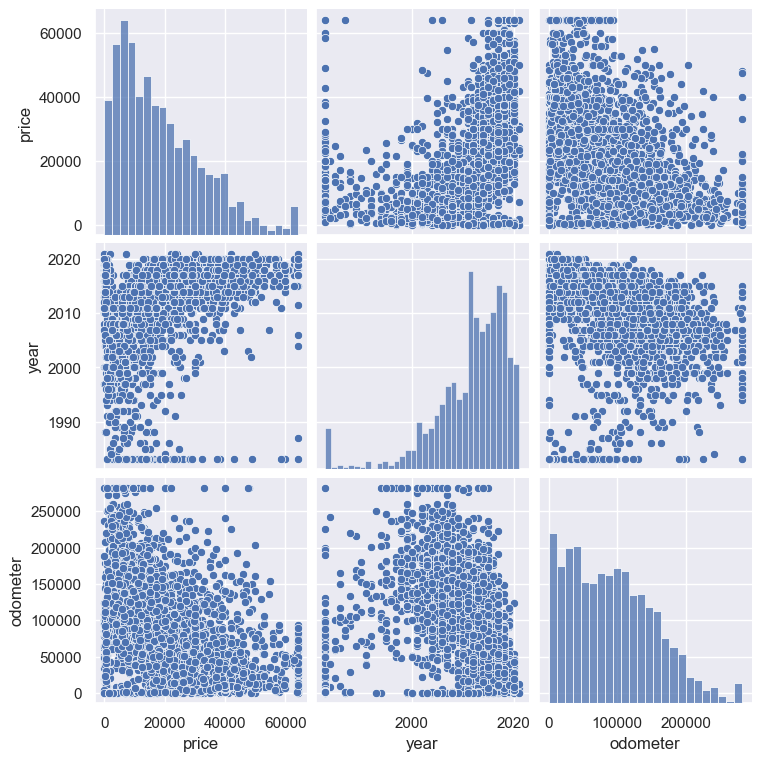

In [45]:
describe_data("Cleaned " + dataset_title, df_cleaned)
visualize_data("Cleaned " + dataset_title, df_cleaned)

## Conclusions from Visualizations

The pair plots show that price is related significantly to the year and odomoter values.

The histograms for price and odometer show distributions skewed towards more frequent values on the lower side, while the histogram for the year shows a distribution skewed towards more frequent higher (recent) years.

Correlation Heatmap

norm: price
norm: year
cat: manufacturer
cat: model
cat: condition
cat: cylinders
cat: fuel
norm: odometer
cat: title_status
cat: transmission
cat: drive
cat: size
cat: type
cat: paint_color
cat: state


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
price,1.000000,-0.075274,-0.014026,0.010252,-0.013844,-0.017116,-0.000001,-0.001107,-0.002450,-0.004863,-0.018377,-0.010066,-0.017651,-0.014821,0.011460
year,-0.075274,1.000000,0.070989,0.065590,-0.028523,-0.136510,0.104408,-0.111546,-0.004519,0.145513,-0.070371,-0.117491,0.133767,0.038167,0.012439
manufacturer,-0.014026,0.070989,1.000000,0.032248,-0.029337,-0.047506,0.002001,-0.025810,0.018070,0.001557,-0.015963,0.023812,0.064311,-0.001977,-0.005160
model,0.010252,0.065590,0.032248,1.000000,0.019595,0.011951,0.078835,-0.009981,0.007256,0.001877,-0.038903,-0.024886,-0.060374,0.018553,0.001111
condition,-0.013844,-0.028523,-0.029337,0.019595,1.000000,0.237648,0.171849,0.007804,0.072886,0.436046,0.155628,0.167413,0.154296,0.145270,-0.008953
cylinders,-0.017116,-0.136510,-0.047506,0.011951,0.237648,1.000000,-0.113587,0.041584,0.034234,-0.055170,0.336948,0.356621,0.182894,0.174822,-0.014832
fuel,-0.000001,0.104408,0.002001,0.078835,0.171849,-0.113587,1.000000,-0.114870,0.012411,0.257576,-0.021960,-0.077350,0.013255,-0.033049,-0.058403
odometer,-0.001107,-0.111546,-0.025810,-0.009981,0.007804,0.041584,-0.114870,1.000000,-0.006626,-0.110798,-0.017723,0.061723,-0.023879,0.026411,-0.000288
title_status,-0.002450,-0.004519,0.018070,0.007256,0.072886,0.034234,0.012411,-0.006626,1.000000,-0.037110,0.024938,0.118108,-0.023400,0.024455,0.006986
transmission,-0.004863,0.145513,0.001557,0.001877,0.436046,-0.055170,0.257576,-0.110798,-0.037110,1.000000,-0.021355,-0.201512,0.135062,0.066863,0.015492


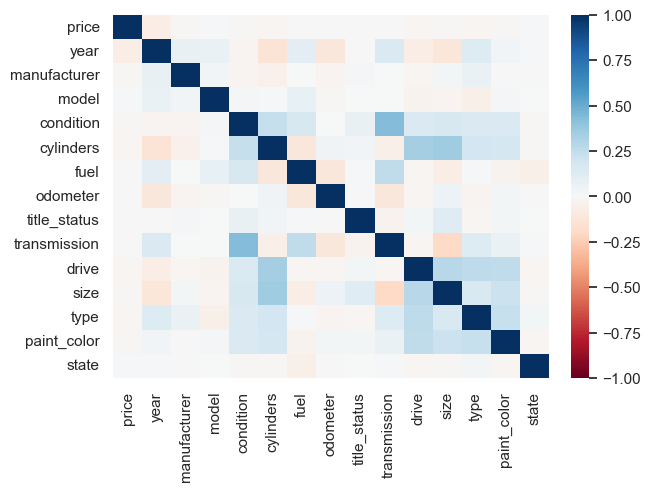

In [49]:
# Let's reexamine the correlation heatmap after cleaning up the outliers and missing values.
show_correlation(df, show_heatmap=True)

## Findings

- [ ] TODO: summarize any visual and quantitative exploratory findings from (1)
- [ ] TODO: outline and motivate a course for (2).
- [ ] TODO: and discussion of why it may be possible to conduct the target analysis,
- [ ] TODO: including any relevant pre-built technologies and tools that will make it possible,  and how. 
- [ ] TODO: discuss the correlations between price and other features.
- [ ] TODO: drop rows with missing price value.
- [ ] TODO: Can be later; handle imputation of misisng values to 0 or 'missing'
- [ ] TODO: Additionally, this inital project planning report should speculate and provide examples for potential analytic outcomes and how we might interpret and build from them, whether towards academic or commercial outcomes.


### Selection of Dataset for Continued Analysis

The Carvana dataset provides very few columns(`Name,Year,Miles,Price`), and a much smaller set of samples than the other datasets.

The CarGurus dataset has the largest rows and the most feature columns avaiable(at 66).
However, it only provides location data as zip code, longitude and latitude, which would make analyzing the effect on price from different areas more difficult since would prefer to just compare prices across US states.

Both the Craigslist and Carvana datasets have some data cleaning work required to remove outliers as well as signficiant numbers of null values.

The TrueCar dataset is by far the cleanest dataset, having no null values, and more columsn than the Carvana dataset. However, the columns available would only allow some of the investigations we have in mind. 
It provides Price,Year,Mileage,City,State,Vin,Make,Model. Vin is of little use without advanced preprocessing based on VIN coding, so the only advantage in features it providese to the Carvana dataset are from location based on `City, State`.

The Craigslist dataset is most amenable to the investigations planned in terms of the columns available. This is because it includes a column for the state location, the same basic make,  model, price, mileage and year information common to all the datasets, but also has a number of additional feature columns which may affect price.
The complete columns are: 
`id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,  fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date`


### Features

It is clear from the correlation values that price is correlated with year of the car. And it is also apparent that the odomoter mileage is negatively correlated with the price. These are not surprising findings.

Other relationships are less obvious from the graphs.


## Limitations

During this phase used sampled 1% of the larger datasets to speed up initial analysis and debugging of code.
Phase two of the project will use the full Craigslist dataset.

Only preliminary data cleaning has been done.


